<a href="https://colab.research.google.com/github/emmanuelngenzirabona/Boot_Camp_Ammi_2021/blob/main/DenseNet_Implemetation_AMMI_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presented by Emmanuel NGENZIRABONA, on August 27, 2021

#Code Implementation: DenseNet
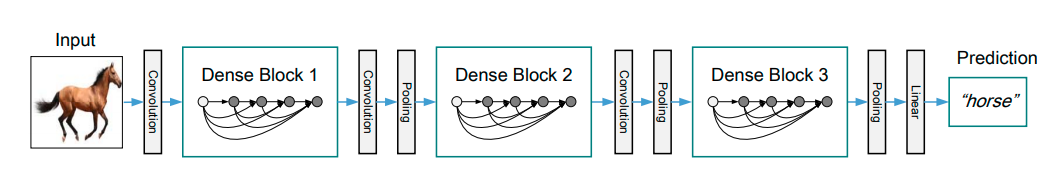

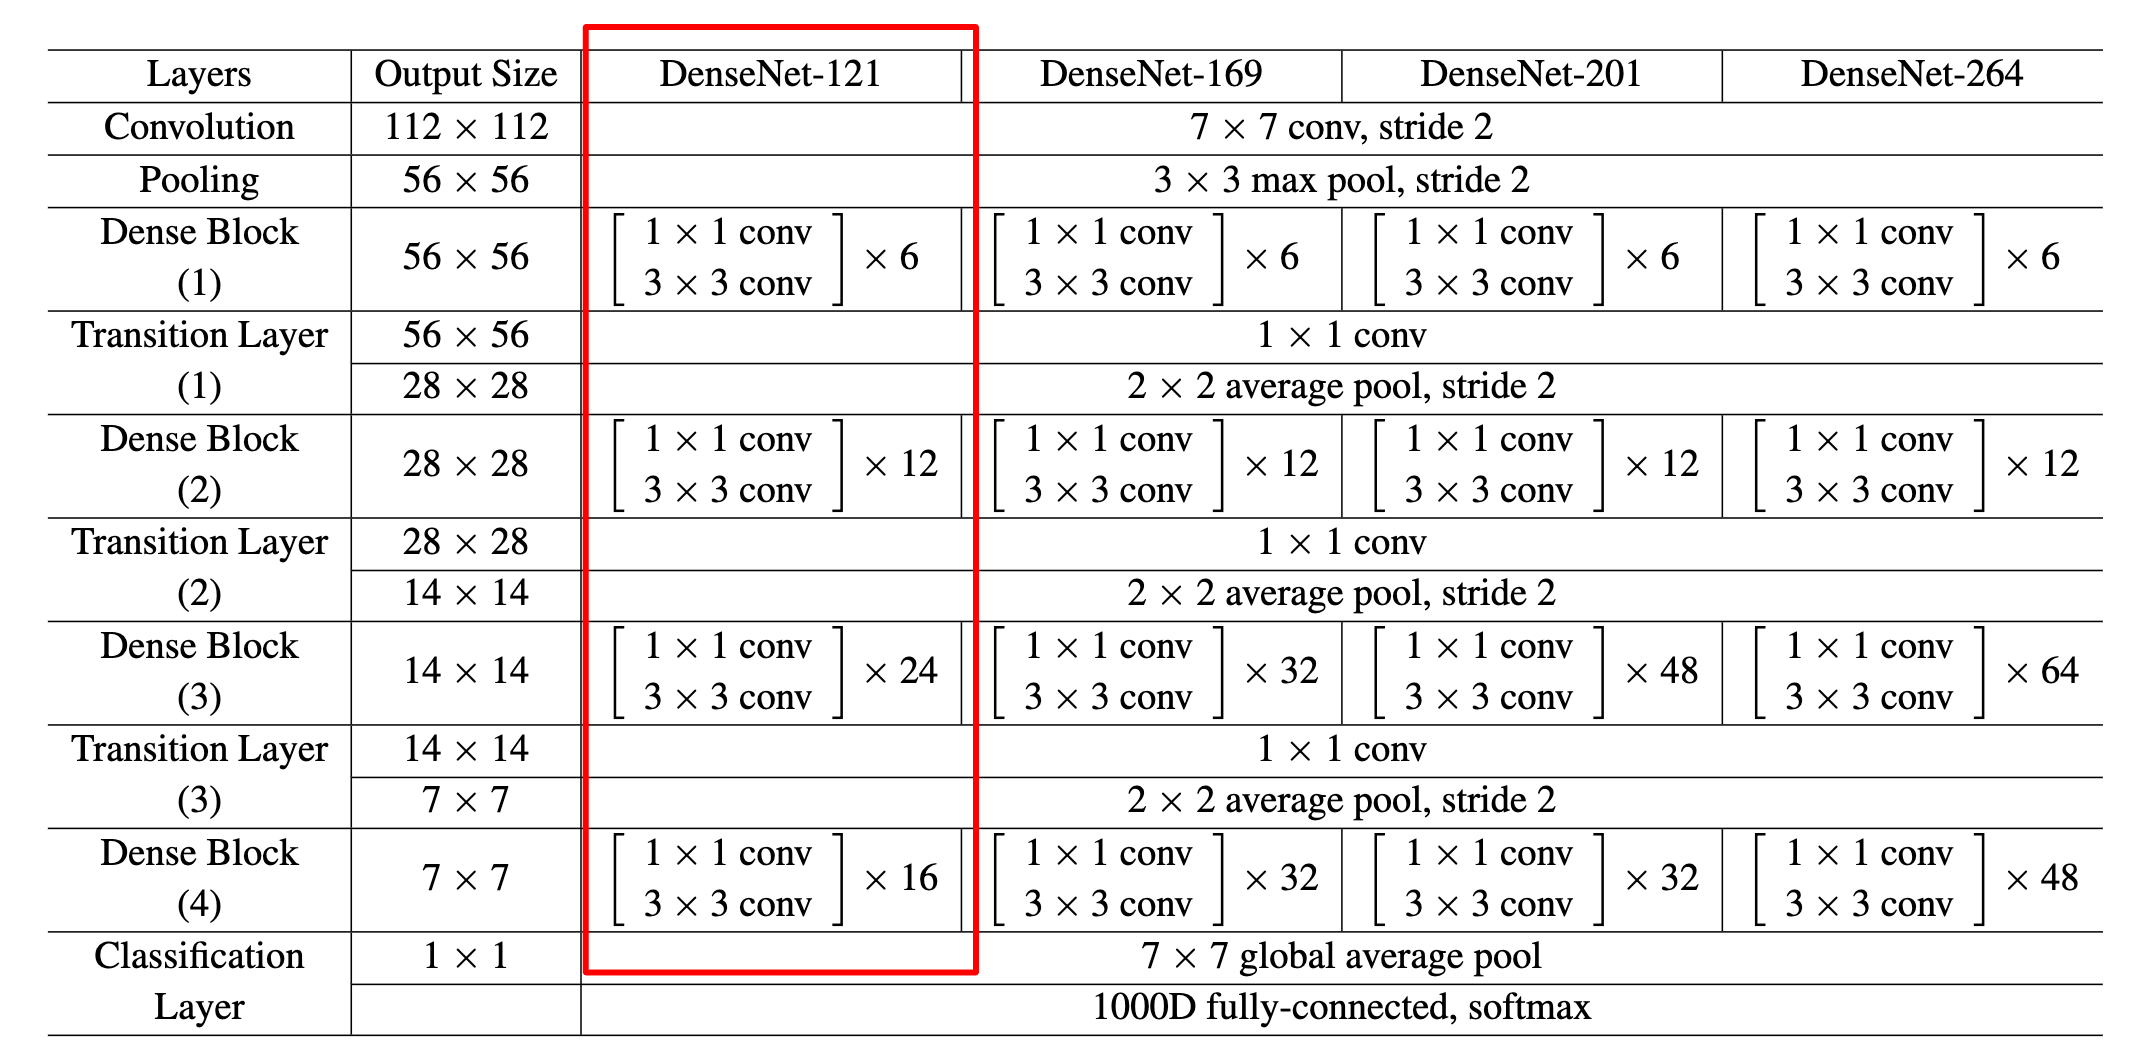

## Define the model

In [16]:
# Importing the neccesary layers
import tensorflow as tf
from tensorflow.keras import Model 
from tensorflow.keras.layers import Input, BatchNormalization, ReLU, \
     Conv2D, Dense, MaxPool2D, AvgPool2D, GlobalAvgPool2D, Concatenate

In [ ]:
#BN-ReLU-Conv function
def bn_rl_conv(x, filters, kernel_size):
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Conv2D(filters=filters,
                kernel_size=kernel_size,
                padding='same')(x)
  return x


In [ ]:
#Dense block
def dense_block(tensor, k, repetitions):
  for _ in range(repetitions):
    x = bn_rl_conv(tensor, filters=4*k, kernel_size=1)
    x = bn_rl_conv(x, filters=k, kernel_size=3)
    tensor = Concatenate()([tensor, x])
  return tensor


In [ ]:
#Transition layer

def transition_layer(x, theta):
    f = int(tensorflow.keras.backend.int_shape(x)[-1] * theta)
    x = bn_rl_conv(x, filters=f, kernel_size=1)
    x = AvgPool2D(pool_size=2, strides=2, padding='same')(x)
    return x

In [ ]:
#DenseNet Model
def create_densenet(input_shape, repetitions, k=32, theta=0.5):

  input = Input(input_shape)

  x = Conv2D(64, 7, strides=2, padding='same')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)

  for reps in repetitions:
    d = dense_block(x, k, reps)
    x = transition_layer(d, theta)
  x = GlobalAvgPool2D()(d)
  
  final_output = Dense(1000, activation='softmax')(x)

  DenseNet = Model(input, final_output)

  return DenseNet



k = 32
theta = 0.5
repetitions = 6, 12, 24, 16
input_shape = 32, 32, 3

densenet_model = create_densenet(input_shape, repetitions)

In [ ]:
densenet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_363 (Conv2D)             (None, 16, 16, 64)   9472        input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 8, 8, 64)     0           conv2d_363[0][0]                 
__________________________________________________________________________________________________
batch_normalization_360 (BatchN (None, 8, 8, 64)     256         max_pooling2d_3[0][0]            
____________________________________________________________________________________________

## Model training

In [18]:
#Configure the model for training, set the optimizer, loss and accuracy
densenet_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate = 0.01, momentum=0.9), metrics=[ 'acc' ])


In [23]:
#define the dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [20]:
y_train.shape

(50000, 10)

In [21]:
densenet_model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 132s 152ms/step - loss: 1.5151 - acc: 0.4496 - val_loss: 1.9654 - val_acc: 0.3579
Epoch 2/20
782/782 [==============================] - 114s 145ms/step - loss: 1.0974 - acc: 0.6088 - val_loss: 1.5642 - val_acc: 0.4923
Epoch 3/20
782/782 [==============================] - 115s 146ms/step - loss: 0.8992 - acc: 0.6824 - val_loss: 1.1963 - val_acc: 0.5842
Epoch 4/20
782/782 [==============================] - 114s 146ms/step - loss: 0.7561 - acc: 0.7339 - val_loss: 1.1721 - val_acc: 0.5874
Epoch 5/20
782/782 [==============================] - 115s 147ms/step - loss: 0.6372 - acc: 0.7767 - val_loss: 1.3569 - val_acc: 0.5791
Epoch 6/20
782/782 [==============================] - 115s 147ms/step - loss: 0.5470 - acc: 0.8064 - val_loss: 1.0740 - val_acc: 0.6405
Epoch 7/20
782/782 [==============================] - 119s 153ms/step - loss: 0.4627 - acc: 0.8366 - val_loss: 1.0568 - val_acc: 0.6704
Epoch 8/20
782/782 [============================

## Evaluation

In [22]:
res = densenet_model.evaluate(x_test, y_test, batch_size=64)

print('Loss :', res[0])
print('Accuracy: ',res[1] * 100,'%')

157/157 [==============================] - 6s 38ms/step - loss: 1.7321 - acc: 0.7098
Loss : 1.7321091890335083
Accuracy:  70.98000049591064 %


.

#Thank you!!